In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


# Latest Dataset

In [3]:
df1 = pd.read_csv('2022_population.csv')

In [4]:
df1.head()

,iso_code,country,2022_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,447,026,721","1,439,323,776","9,706,961 sq_km",149/sq_km,0.29%,18.21%,1
1,IND,India,"1,402,170,311","1,380,004,385","3,287,590 sq_km",428/sq_km,0.95%,17.68%,2
2,USA,United States,"334,159,979","331,002,651","9,372,610 sq_km",36/sq_km,0.57%,4.21%,3
3,IDN,Indonesia,"278,195,834","273,523,615","1,904,569 sq_km",147/sq_km,1.00%,3.51%,4
4,PAK,Pakistan,"228,044,068","220,892,340","881,912 sq_km",260/sq_km,1.90%,2.89%,5


In [5]:
df1.tail()

,iso_code,country,2022_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
219,MSR,Montserrat,"4,965","4,992",102 sq_km,49/sq_km,-0.24%,0.00%,228
220,FLK,Falkland Islands,"3,539","3,480","12,173 sq_km",0/sq_km,0.17%,0.00%,229
221,NIU,Niue,"1,622","1,626",260 sq_km,6/sq_km,0.19%,0.00%,230
222,TKL,Tokelau,"1,378","1,357",12 sq_km,115/sq_km,0.36%,0.00%,231
223,VAT,Vatican City,799,801,1 sq_km,799/sq_km,-0.12%,0.00%,232


In [6]:
df1.drop(['iso_code', 'area', 'density_sq_km', 'world_%'], axis=1, inplace=True)

In [7]:
df1.head(10)

,country,2022_last_updated,2020_population,growth_rate,rank
0,China,"1,447,026,721","1,439,323,776",0.29%,1
1,India,"1,402,170,311","1,380,004,385",0.95%,2
2,United States,"334,159,979","331,002,651",0.57%,3
3,Indonesia,"278,195,834","273,523,615",1.00%,4
4,Pakistan,"228,044,068","220,892,340",1.90%,5
5,Nigeria,"214,937,134","206,139,589",2.53%,6
6,Brazil,"214,894,630","212,559,417",0.64%,7
7,Bangladesh,"167,354,615","164,689,383",0.95%,8
8,Russia,"145,836,446","145,934,462",-0.07%,9
9,Mexico,"131,123,441","128,932,753",1.00%,10


In [8]:
df1.isnull().sum()

country              0
2022_last_updated    0
2020_population      0
growth_rate          0
rank                 0
dtype: int64

In [9]:
df1.shape

(224, 5)

In [10]:
df1.dtypes

country              object
2022_last_updated    object
2020_population      object
growth_rate          object
rank                  int64
dtype: object

In [11]:
df1.describe(include='all')

,country,2022_last_updated,2020_population,growth_rate,rank
count,224,224,224,224,224.000000
unique,224,224,224,163,NaN
top,Saint Pierre And Miquelon,"900,875","5,421,241",0.75%,NaN
freq,1,1,1,4,NaN
mean,NaN,NaN,NaN,NaN,115.008929
std,NaN,NaN,NaN,NaN,66.840684
min,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,NaN,NaN,57.750000
50%,NaN,NaN,NaN,NaN,113.500000
75%,NaN,NaN,NaN,NaN,171.250000


# Data Cleaning

In [12]:
# Replace commas with nothing for 2022 column 
df1['2022_last_updated'] = df1['2022_last_updated'].str.replace(',', '')

In [13]:
df1.head()

,country,2022_last_updated,2020_population,growth_rate,rank
0,China,1447026721,"1,439,323,776",0.29%,1
1,India,1402170311,"1,380,004,385",0.95%,2
2,United States,334159979,"331,002,651",0.57%,3
3,Indonesia,278195834,"273,523,615",1.00%,4
4,Pakistan,228044068,"220,892,340",1.90%,5


In [14]:
# Replace commas with nothing for 2020 column 
df1['2020_population'] = df1['2020_population'].str.replace(',', '')

In [15]:
df1.head()

,country,2022_last_updated,2020_population,growth_rate,rank
0,China,1447026721,1439323776,0.29%,1
1,India,1402170311,1380004385,0.95%,2
2,United States,334159979,331002651,0.57%,3
3,Indonesia,278195834,273523615,1.00%,4
4,Pakistan,228044068,220892340,1.90%,5


In [16]:
#Replace % sign from growth rate
df1['growth_rate'] = df1['growth_rate'].str.replace('%', '')

In [17]:
df1.head()

,country,2022_last_updated,2020_population,growth_rate,rank
0,China,1447026721,1439323776,0.29,1
1,India,1402170311,1380004385,0.95,2
2,United States,334159979,331002651,0.57,3
3,Indonesia,278195834,273523615,1.00,4
4,Pakistan,228044068,220892340,1.90,5


In [18]:
# Convert the 3 columns to integer 
df1['2022_last_updated'] = df1['2022_last_updated'].astype(int)
df1['2020_population'] = df1['2020_population'].astype(int)
df1['growth_rate'] = df1['growth_rate'].astype(float)

In [19]:
df1.dtypes

country               object
2022_last_updated      int32
2020_population        int32
growth_rate          float64
rank                   int64
dtype: object

# Visualisation

In [20]:
# Top 10 Countries Visual 
top_10_countries = df1.groupby('country')['2022_last_updated'].mean().sort_values(ascending=False).head(10).reset_index()

<AxesSubplot:title={'center':'Top 10 countries '}, xlabel='country', ylabel='2022_last_updated'>

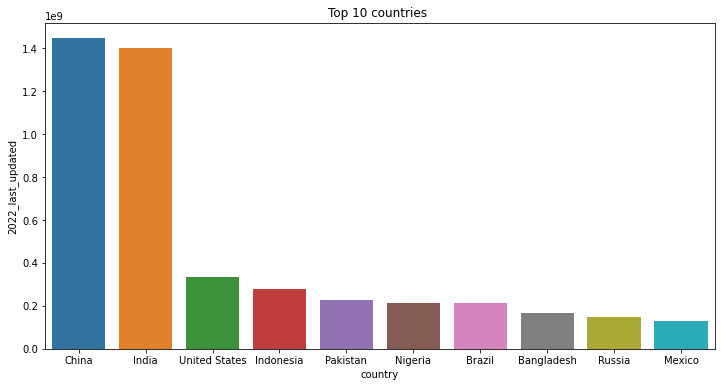

In [21]:
plt.figure(figsize=(12,6))
plt.title('Top 10 countries ')
sns.barplot(x='country', y='2022_last_updated', data=top_10_countries)

<AxesSubplot:xlabel='country', ylabel='2022_last_updated'>

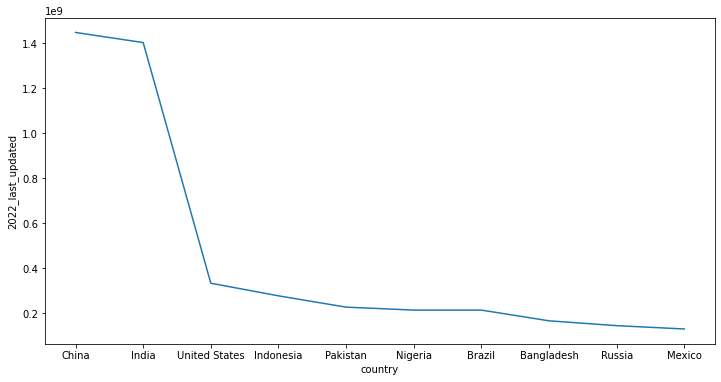

In [22]:
plt.figure(figsize=(12,6))
sns.lineplot(x='country', y='2022_last_updated', data=top_10_countries)

In [23]:
# Growth Rate Visual
top_10_growth_rate = df1.groupby('country')['growth_rate'].mean().sort_values(ascending=False).head(10).reset_index()
top_10_growth_rate

,country,growth_rate
0,Syria,5.96
1,Niger,3.79
2,Equatorial Guinea,3.23
3,Angola,3.22
4,Burundi,3.01
5,Mali,2.96
6,Somalia,2.95
7,Chad,2.95
8,Tanzania,2.93
9,Zambia,2.90


<AxesSubplot:xlabel='country', ylabel='growth_rate'>

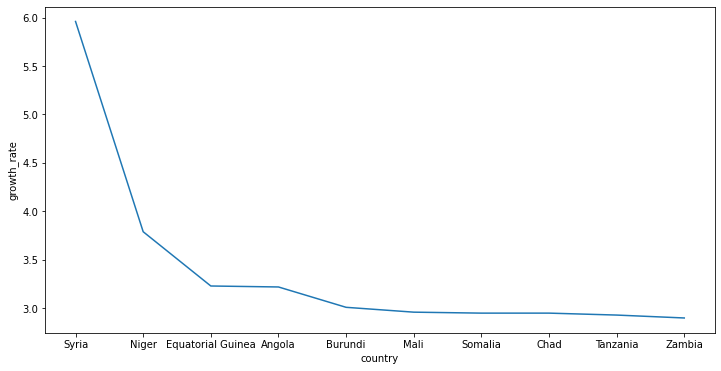

In [24]:
plt.figure(figsize=(12,6))
sns.lineplot(x='country', y='growth_rate', data=top_10_growth_rate)

In [25]:
# Pie chart visual
top_5_countries = df1.groupby('country')['2022_last_updated'].mean().sort_values(ascending=False).head(5).reset_index()
top_5_countries

,country,2022_last_updated
0,China,1447026721
1,India,1402170311
2,United States,334159979
3,Indonesia,278195834
4,Pakistan,228044068


([<matplotlib.patches.Wedge at 0x1d955d9c160>,
 [Text(0.36547893973044265, 1.0375091057978776, 'China'),
  Text(-0.9564937087006651, -0.5432492845978238, 'India'),
  Text(0.45272011154529107, -1.0025190774256716, 'United States'),
  Text(0.8919161526711716, -0.643805542539248, 'Indonesia'),
  Text(1.0793283642729792, -0.21225051725688543, 'Pakistan')],
 [Text(0.1993521489438778, 0.5659140577079332, '39%'),
  Text(-0.5217238411094537, -0.296317791598813, '38%'),
  Text(0.24693824266106784, -0.5468285876867298, '9%'),
  Text(0.4864997196388208, -0.3511666595668625, '8%'),
  Text(0.5887245623307158, -0.11577300941284659, '6%')])

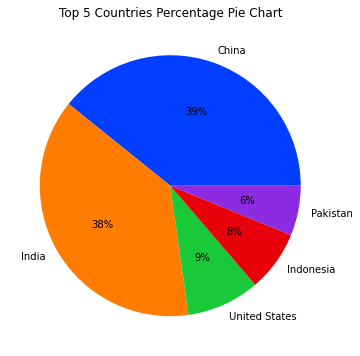

In [26]:
colors = sns.color_palette('bright')[0:5]
plt.figure(figsize=(12,6))
plt.title('Top 5 Countries Percentage Pie Chart')
plt.pie(top_5_countries['2022_last_updated'], labels = top_5_countries['country'], colors = colors, autopct='%.0f%%')

C:\Users\Akshay\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:title={'center':'Top 5 Countries Distribution Chart'}, xlabel='2022_last_updated', ylabel='Density'>

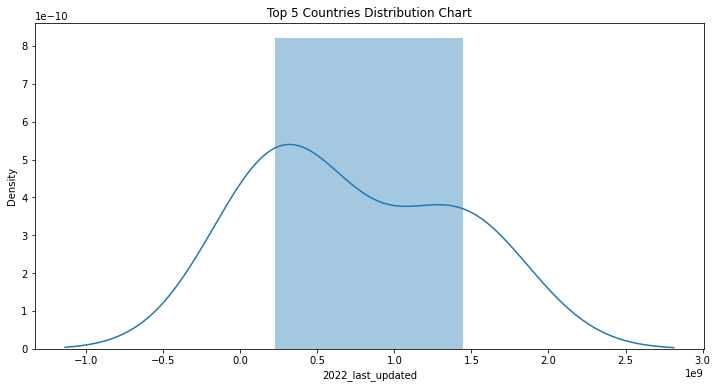

In [27]:
#Distribution Plot 
plt.figure(figsize=(12,6))
plt.title('Top 5 Countries Distribution Chart')
sns.distplot(top_5_countries['2022_last_updated'])

In [28]:
#pairplot of all df1 columns

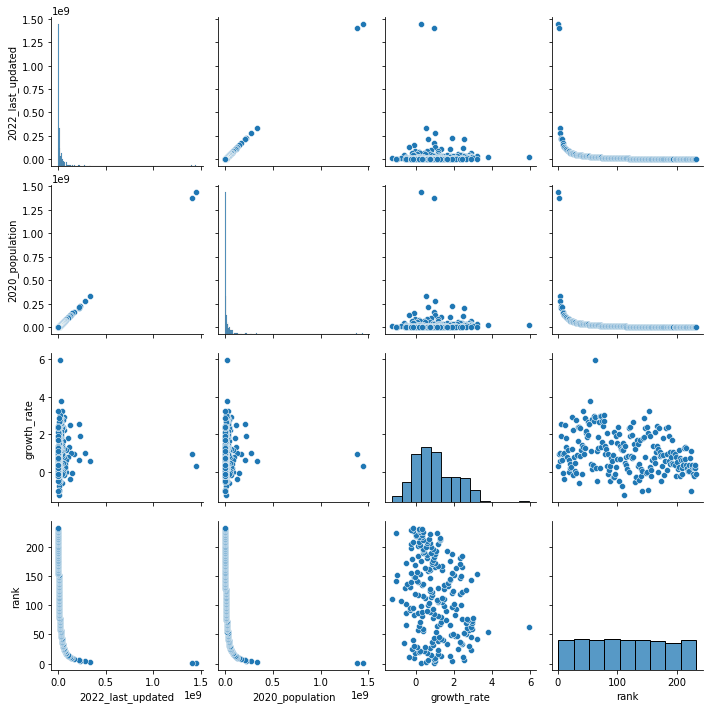

In [29]:
sns.pairplot(df1)

# Profiling Report